In [102]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [103]:
import sys
import joblib
import numpy as np
from keras.models import load_model
from sklearn import metrics
import os
import pandas as pd
import shutil
from pathlib import Path
from tqdm import tqdm

sys.path.insert(0,'/content/gdrive/MyDrive/ResearchProject/classification/TL_BaseModel/')
from TL_BaseModel import *

In [104]:
root_dir = '/content/gdrive/MyDrive/ResearchProject/classification/TL_BaseModel/'
TL_path = "/content/gdrive/MyDrive/ResearchProject/TL_results/"
Base_model_path ='/content/gdrive/MyDrive/ResearchProject/classification_results_2023/'
output_path = '/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/'


In [17]:
ls $Base_model_path

SB-001/  SB-078/


In [18]:
ls $TL_path

diagrams/
TLSI_TL3_2f_28_32f_20f_20_1_evaluation_metrics.csv
TLSI_TL3_2f_28_32f_20f_20_1_evaluation_metrics.gsheet


In [19]:
ls $output_path

SB-001/
SB-001-TLSI_TL3_2f_28_32f_20f_20_1_1000_1000_2.hdf5
sklearn_models_balanced_for_train_bestModel_SVM_SB-001.joblib
TL_Base_total_evaluation_result.csv


In [183]:
#cols = ['Weighted Accuracy', 'Sensitivity/Recall', 'Precision_avg', 'F1_avg', 'Accuracy', 'Specificity','Precision', 'Precision_class1', 'F1', 'F1_class1', 'Dice', 'Jaccard']
cols = ["arch","Weighted Accuracy", "Sensitivity/Recall", "Specificity", "Precision_class0", "Precision_class1", "Precision_avg", "F1_class0", "F1_class1", "F1_avg", "auc_roc_score", "False_Discovery_Rate", "False_Negative_Rate", "False_Omission_Rate", "False_Positive_Rate", "Jaccard"]
target_id = 'SB-078'
TL_category_group = 'TL3_2f_28_32f_20f_20_1'
Base_model_category_group = 'NaiveBayes'

### 1. generate cvs file including different architecture

In [184]:
def combine_csv(cols, pd_id, csv_path):
   # Read the CSV file into a DataFrame and skip the first row to use it as column names
    df = pd.read_csv(csv_path)
    # Rename the 'Unnamed: 0' column to 'arch'
    df.rename(columns={'Unnamed: 0': 'arch'}, inplace=True)
    # Filter rows based on the target ID
    target_rows = df['arch'].str.startswith(pd_id)
    df = df[target_rows]
# Add the architecture name to the 'arch' column where there is 'SB001'
    df['arch'] = df['arch'].apply(lambda x: x.replace(pd_id, TL_category_group))
    df.set_index(['arch'], inplace = True)
    return df
''''file_names = os.listdir(csv_path)

  df_res = pd.DataFrame(columns=cols)
  architecture_names = []

  for file_name in file_names:
      if file_name[-3:]=='csv':
        architecture_name = file_name[:-28]
        architecture_names.append(architecture_name)
        df = pd.read_csv(csv_path + file_name)

        column_names=df.columns.values[1:]

        for column_name in column_names:
          values = df[column_name].tolist()
          res = {}
          if column_name == target_id:
            for key in cols:
              for value in values:
                  res[key] = value
                  values.remove(value)
                  break

            df_res = df_res.append(res, ignore_index=True)

  if df_res.shape[0]==len(architecture_names):
    df_res['arch'] = architecture_names
    df_res.set_index(['arch'], inplace = True)
    filename= output_path + 'perarch.csv'
    df_res.to_csv(filename)
    return df_res
  else:
    print(architecture_names)'''


"'file_names = os.listdir(csv_path)\n\n  df_res = pd.DataFrame(columns=cols)\n  architecture_names = []\n\n  for file_name in file_names:\n      if file_name[-3:]=='csv':\n        architecture_name = file_name[:-28]\n        architecture_names.append(architecture_name)\n        df = pd.read_csv(csv_path + file_name)\n\n        column_names=df.columns.values[1:]\n\n        for column_name in column_names:\n          values = df[column_name].tolist()\n          res = {}\n          if column_name == target_id:\n            for key in cols:\n              for value in values:\n                  res[key] = value\n                  values.remove(value)\n                  break\n\n            df_res = df_res.append(res, ignore_index=True)\n\n  if df_res.shape[0]==len(architecture_names):\n    df_res['arch'] = architecture_names\n    df_res.set_index(['arch'], inplace = True)\n    filename= output_path + 'perarch.csv'\n    df_res.to_csv(filename)\n    return df_res\n  else:\n    print(architec

In [162]:


TL_csv_path = TL_path + "TLSI_TL3_2f_28_32f_20f_20_1_evaluation_metrics.csv"
df = combine_csv(cols, target_id, TL_csv_path)
df

,Weighted Accuracy,Sensitivity/Recall,Specificity,Precision_class0,Precision_class1,Precision_avg,F1_class0,F1_class1,F1_avg,auc_roc_score,False_Discovery_Rate,False_Negative_Rate,False_Omission_Rate,False_Positive_Rate,Jaccard
arch,,,,,,,,,,,,,,,
TL3_2f_28_32f_20f_20_1_100_100_POP_FOLD_0,0.678388,0.666667,0.690110,0.472994,0.823016,0.648005,0.549523,0.749775,0.649649,0.678388,0.333333,0.176984,0.309890,0.527006,0.381624
TL3_2f_28_32f_20f_20_1_100_100_POP_FOLD_1,0.708861,0.629148,0.788574,0.570833,0.831951,0.701392,0.592172,0.807591,0.699882,0.708861,0.370852,0.168049,0.211426,0.429167,0.424848
TL3_2f_28_32f_20f_20_1_100_300_POP_FOLD_0,0.779693,0.764791,0.794595,0.613690,0.880082,0.746886,0.657028,0.827903,0.742466,0.779693,0.235209,0.119918,0.205405,0.386310,0.492809
TL3_2f_28_32f_20f_20_1_100_300_POP_FOLD_1,0.674501,0.565476,0.783526,0.541636,0.806628,0.674132,0.549754,0.793509,0.671632,0.674501,0.434524,0.193372,0.216474,0.458364,0.379750
TL3_2f_28_32f_20f_20_1_100_500_POP_FOLD_0,0.695718,0.636206,0.755231,0.525381,0.824555,0.674968,0.574145,0.788095,0.681120,0.695718,0.363794,0.175445,0.244769,0.474619,0.403680
TL3_2f_28_32f_20f_20_1_100_500_POP_FOLD_1,0.777737,0.720833,0.834641,0.643849,0.872973,0.758411,0.669419,0.850350,0.759885,0.777737,0.279167,0.127027,0.165359,0.356151,0.506216
TL3_2f_28_32f_20f_20_1_300_100_POP_FOLD_0,0.722208,0.700292,0.744124,0.540315,0.847076,0.693696,0.609324,0.792255,0.700790,0.722208,0.299708,0.152924,0.255876,0.459685,0.438314
TL3_2f_28_32f_20f_20_1_300_100_POP_FOLD_1,0.698388,0.694005,0.702772,0.501443,0.842912,0.672177,0.579679,0.765743,0.672711,0.698388,0.305995,0.157088,0.297228,0.498557,0.412175
TL3_2f_28_32f_20f_20_1_300_300_POP_FOLD_0,0.738414,0.661376,0.815452,0.608929,0.848051,0.728490,0.624020,0.828478,0.726249,0.738414,0.338624,0.151949,0.184548,0.391071,0.453793


### 2. find the best TL model

In [118]:
def find_best_TL_model(df, target_id, TL_path, TL_category_group, output_path):

  bestModel = df['Sensitivity/Recall'].idxmax()
  TL_model_path = TL_path +'diagrams/'+ target_id + '/'

  print(bestModel)
  print(TL_path)
  print(TL_model_path)

  file_names = os.listdir(TL_model_path)

  for file_name in file_names:
    if file_name[-5:]!='.hdf5':
      continue

    if bestModel in file_name:
      print(file_name)

      tl_model_path=TL_model_path + file_name
      output_path_file = output_path + file_name
      print(tl_model_path)
      print(output_path_file)

  shutil.copyfile(tl_model_path, output_path_file)


In [89]:
temp = find_best_TL_model(df, target_id, TL_path, TL_category_group, output_path)
temp

TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0
/content/gdrive/MyDrive/ResearchProject/TL_results/
/content/gdrive/MyDrive/ResearchProject/TL_results/diagrams/SB-078/
SB-078-TLSI_TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0.hdf5
/content/gdrive/MyDrive/ResearchProject/TL_results/diagrams/SB-078/SB-078-TLSI_TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0.hdf5
/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/SB-078-TLSI_TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0.hdf5


### 3. find the best Base model

In [185]:


def find_best_base_model(Base_model_path, target_id, Base_model_category_group, output_path):

  Base_model_path = Base_model_path +  target_id+'/'+Base_model_category_group + '/diagrams/' + target_id +'/'

  print(Base_model_path)

  file_names = os.listdir(Base_model_path)

  for file_name in file_names:
    if file_name[-7:]!='.joblib':
      continue
    base_model_path = Base_model_path + file_name
    output_path_file = output_path + file_name
    print(base_model_path)
  print(output_path)

  shutil.copyfile(base_model_path, output_path_file)


In [186]:
find_best_base_model(Base_model_path, target_id, Base_model_category_group, output_path)

/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/NaiveBayes/diagrams/SB-078/
/content/gdrive/MyDrive/ResearchProject/classification_results_2023/SB-078/NaiveBayes/diagrams/SB-078/sklearn_models_balanced_for_train_bestModel_NaiveBayes_SB-078.joblib
/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/


### 4. TL + Base model

In [187]:
file_path = "/content/gdrive/MyDrive/ResearchProject/data/labeled_normal_data/new_TLSI_input/all_pids_q=0.2.npy" #Change here if input file should change
file_path

'/content/gdrive/MyDrive/ResearchProject/data/labeled_normal_data/new_TLSI_input/all_pids_q=0.2.npy'

In [188]:
##### KEY TROUBLESHOOTING NOTE
##### `np.load` returns a `numpy ndarray`
data_ndarr = np.load(file_path, allow_pickle=True)
print(type(data_ndarr))

##### That array has a method `item()`,
##### which returns a *dictionary* of key-values: `p_id`:`DataFrame`
datadict = data_ndarr.item()
print(type(datadict))
datadict['SB-078'].head(5)

<class 'numpy.ndarray'>
<class 'dict'>


,id,date,age,sex,BMI,income,road_dist,cooking,am_pef_org,y_am_pef,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
1,SB-078,2017-12-19,78,1,23.873,0.143,0.5,1.0,350.0,1.000,...,0.499,0.578,0.179,0.467,0.812,0.810,0.450,0.135,0.202,1.0
2,SB-078,2017-12-20,78,1,23.873,0.143,0.5,1.0,350.0,0.875,...,0.349,0.320,0.069,0.268,1.000,1.000,0.682,0.223,0.134,1.0
3,SB-078,2017-12-21,78,1,23.873,0.143,0.5,1.0,350.0,0.875,...,0.276,0.725,0.172,0.462,0.922,0.919,0.264,0.128,0.202,1.0
4,SB-078,2017-12-22,78,1,23.873,0.143,0.5,1.0,350.0,0.875,...,0.166,0.532,0.169,0.465,0.907,0.903,0.704,0.231,0.236,1.0
5,SB-078,2017-12-23,78,1,23.873,0.143,0.5,1.0,350.0,0.875,...,0.377,0.697,0.291,0.607,0.729,0.723,0.433,0.146,0.288,1.0


In [189]:
print(len(datadict))

p_ids = datadict.keys()
print("\t\t\t\tpatients: n =", len(p_ids), end='\n\n')

for p_id in p_ids:
    df = datadict[p_id]
    # drop column from input data file
    df.drop(['id','date','am_pef_org','BMI',  'sex', 'age'], axis=1, inplace=True) #'id', 'sex', 'age','am_pef_org','BMI'
    df = np.asarray(df).astype(np.float32)
    print(p_id, "shape:", df.shape, end="\t\t")
print()
print(type(datadict[p_id]))
datadict[p_id].head(4)

26
				patients: n = 26

SB-001 shape: (188, 28)		SB-003 shape: (180, 28)		SB-008 shape: (178, 28)		SB-011 shape: (210, 28)		SB-012 shape: (194, 28)		SB-022 shape: (204, 28)		SB-023 shape: (194, 28)		SB-025 shape: (117, 28)		SB-028 shape: (92, 28)		SB-033 shape: (53, 28)		SB-037 shape: (210, 28)		SB-043 shape: (191, 28)		SB-056 shape: (191, 28)		SB-059 shape: (203, 28)		SB-060 shape: (88, 28)		SB-070 shape: (202, 28)		SB-071 shape: (124, 28)		SB-073 shape: (161, 28)		SB-078 shape: (153, 28)		SB-079 shape: (142, 28)		SB-080 shape: (181, 28)		SB-081 shape: (34, 28)		SB-082 shape: (137, 28)		SB-083 shape: (206, 28)		SB-089 shape: (49, 28)		SB-112 shape: (180, 28)		
<class 'pandas.core.frame.DataFrame'>


,income,road_dist,cooking,y_am_pef,tempin,humidin,pm25in,co2in,tempdiffin,humidiffin,...,windsd,humid,varp,dewpt,airp,seap,solrhr,solramnt,grdt,class
1,0.857,0.0,0.167,0.558,0.216,0.513,0.358,0.678,0.562,0.364,...,0.107,0.668,0.174,0.471,0.822,0.819,0.165,0.003,0.206,0.0
2,0.857,0.0,0.167,0.006,0.299,0.521,0.411,0.700,0.436,0.672,...,0.171,0.388,0.190,0.491,0.676,0.670,0.603,0.165,0.383,0.0
3,0.857,0.0,0.167,0.078,0.420,0.713,0.372,0.918,0.469,0.821,...,0.515,0.359,0.197,0.481,0.519,0.518,0.485,0.104,0.346,1.0
4,0.857,0.0,0.167,0.428,0.438,0.468,0.224,0.762,0.560,0.490,...,0.338,0.527,0.175,0.467,0.596,0.596,0.491,0.141,0.339,0.0


In [190]:
model_path = output_path

Base_model_category_group = 'NaiveBayes'
TL_category_group = 'TL3_2f_28_32f_20f_20_1'

file_names = os.listdir(model_path)

for file_name in file_names:
  if TL_category_group in file_name:
    TL_model_dir = model_path + file_name
  if (Base_model_category_group in file_name) and (file_name[-7:]=='.joblib'):
    #print(file_name)
    Base_model_dir = model_path + file_name

print(TL_model_dir)
print(Base_model_dir)

/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/SB-078-TLSI_TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0.hdf5
/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/sklearn_models_balanced_for_train_bestModel_NaiveBayes_SB-078.joblib


In [191]:
ls $model_path

SB-001/
SB-001-TLSI_TL3_2f_28_32f_20f_20_1_1000_1000_2.hdf5
SB-078/
SB-078-TLSI_TL3_2f_28_32f_20f_20_1_500_500_POP_FOLD_0.hdf5
sklearn_models_balanced_for_train_bestModel_2K-NN_SB-078.joblib
sklearn_models_balanced_for_train_bestModel_LogisticRegression_SB-078.joblib
sklearn_models_balanced_for_train_bestModel_NaiveBayes_SB-078.joblib
sklearn_models_balanced_for_train_bestModel_SVM_SB-001.joblib
sklearn_models_balanced_for_train_bestModel_SVM_SB-078.joblib
TL_Base_total_evaluation_result.csv


In [192]:
%run  '/content/gdrive/MyDrive/ResearchProject/classification/TL_BaseModel/TL_BaseModel.py'

<Figure size 640x480 with 0 Axes>

  0%|          | 0/1 [00:00<?, ?it/s]

~~~~~~~~~~~~~~~ SB-078 ~~~~~~~~~~~~~~~~~~~~
================================================ 0 ================================================
---------------TL_Modle---------------
2/2 [==============================] - 0s 4ms/step
cm [[ 0 19]
 [ 1 31]]
cm.ravel() [ 0 19  1 31]
TL e_rsults:  [0.484375   0.         0.96875    0.         0.62       0.31
 0.         0.75609756 0.37804878 0.484375   1.         0.38
 0.03125    1.         0.        ]
TL c_matrix:  [[ 0 19]
 [ 1 31]]
---------------feature extract for Base Model---------------
5/5 [==============================] - 0s 3ms/step
---------------Base_Modle---------------
/content/gdrive/MyDrive/ResearchProject/TL_BaseModel_results/sklearn_models_balanced_for_train_bestModel_NaiveBayes_SB-078.joblib
2/2 [==============================] - 0s 4ms/step
cm [[15  4]
 [ 7 25]]
cm.ravel() [15  4  7 25]
TL_Base e_rsults:  [0.78536184 0.78947368 0.78125    0.68181818 0.86206897 0.77194357
 0.73170732 0.81967213 0.77568972 0.78536184 0.2

/content/gdrive/MyDrive/ResearchProject/classification/TL_BaseModel/TL_BaseModel.py:193: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels([''] + ['0', '1'], fontsize='xx-large')
/content/gdrive/MyDrive/ResearchProject/classification/TL_BaseModel/TL_BaseModel.py:194: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_yticklabels([''] + ['0', '1'], fontsize='xx-large')


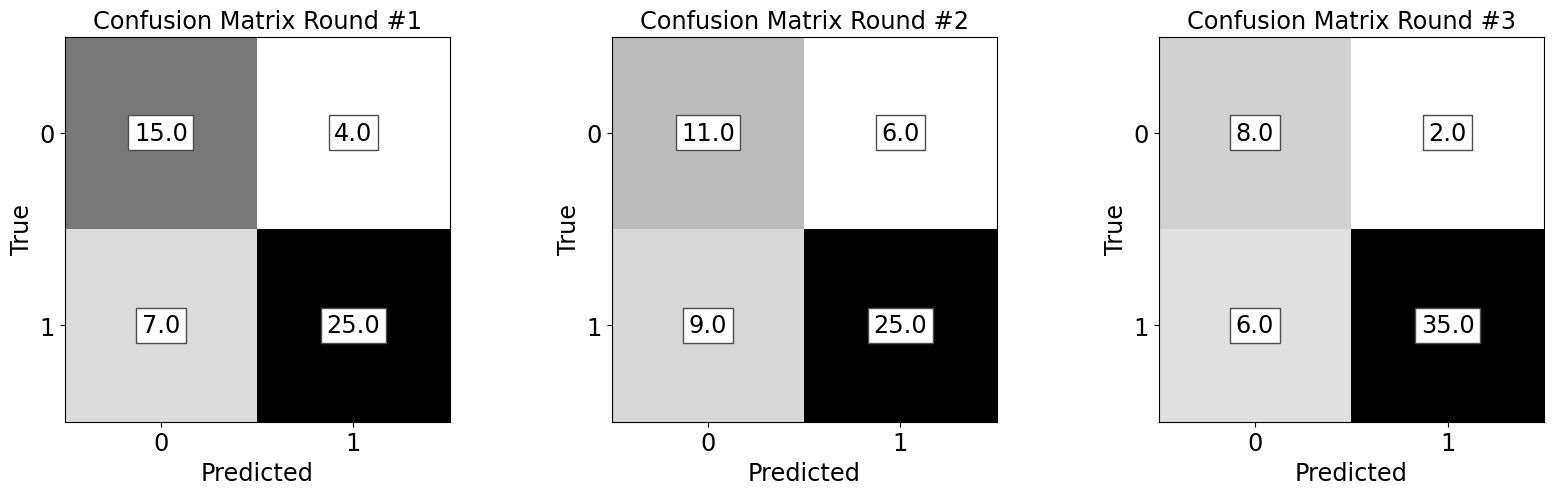

100%|██████████| 1/1 [00:03<00:00,  3.23s/it]


In [193]:
#for target_id in p_ids:
#EVALUATION_METRICS = ['Weighted Accuracy', 'Sensitivity/Recall', 'Precision_avg', 'F1_avg', 'Accuracy', 'Specificity','Precision', 'Precision_class1', 'F1', 'F1_class1', 'Dice', 'Jaccard']
EVALUATION_METRICS = ["Weighted Accuracy", "Sensitivity/Recall", "Specificity", "Precision_class0", "Precision_class1", "Precision_avg", "F1_class0", "F1_class1", "F1_avg", "auc_roc_score", "False_Discovery_Rate", "False_Negative_Rate", "False_Omission_Rate", "False_Positive_Rate", "Jaccard"]

df_evaluation_results = pd.DataFrame(index=EVALUATION_METRICS)

for target in tqdm(["SB-078"]):
    print('~~~~~~~~~~~~~~~', target, '~~~~~~~~~~~~~~~~~~~~')
    patient_dir = Path(output_path) / target_id

    # create directory for this patient
    if not (patient_dir.exists() and patient_dir.is_dir()):
        patient_dir.mkdir()

    # Mark: EXPLICITLY set binary outcome variable for supervised learning
    CLASS_VAR = 'class'; #EXPLANATORY_VAR = '

    # load target patient data
    dataset_list = split_data(target=target, data=datadict, class_var=CLASS_VAR, balance=True)

    # setup for k-fold cross-validation
    kfold_evaluation_results_list = []
    kfold_confusion_matrix_list = []

    for i in range(3):
      print('================================================', i, '================================================',)
      X_train, X_test, Y_train, Y_test = dataset_list[i]

      print("---------------TL_Modle---------------")
      model = load_model(TL_model_dir, compile=False)
      y_hat  = model.predict(X_test)
     # print(y_hat)
      y_pred = (y_hat+0.5).astype(int)
      #print(y_pred)
      e_rsults, c_matrix = evaluate(y_pred,Y_test)
      print("TL e_rsults: ", e_rsults)
      print("TL c_matrix: ", c_matrix)

      print("---------------feature extract for Base Model---------------")
      tl_model= Model(inputs=model.input, outputs=model.layers[-2].output)

      #Now, let us use training features from neural network for Base------------------------
      feature_extractor=tl_model.predict(X_train)
      features = feature_extractor.reshape(feature_extractor.shape[0], -1)
      X__train_for_Base = features #This is our X input to Base

      print("---------------Base_Modle---------------")
      print(Base_model_dir)
      Base_model = joblib.load(Base_model_dir)

      # Train the model on training data
      Base_model.fit(X__train_for_Base, Y_train.ravel()) #For sklearn no one hot encoding

      #Send test data through same feature extractor process---------------
      X_test_feature = tl_model.predict(X_test)
      X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

      #Now predict using the trained Base model.
      y_test_prediction = Base_model.predict(X_test_feature)
      e_rsults, c_matrix = evaluate(y_test_prediction.reshape(y_test_prediction.shape[0], -1),Y_test)
      print("TL_Base e_rsults: ", e_rsults)
      print("TL_Base c_matrix: ", c_matrix)

      kfold_evaluation_results_list.append(e_rsults)
      kfold_confusion_matrix_list.append(c_matrix)

    avg_results = np.array(kfold_evaluation_results_list).mean(0)
    df_evaluation_results[target] = avg_results
    df_evaluation_results.to_csv(os.path.join(str(patient_dir)+"/",Base_model_category_group+"-"+'TL_Base_total_evaluation_result.csv')) #TOTAL

    confusion_matrixes_file = str(patient_dir) +"/" + 'TL_Base_confusion_matrix_' + target
    print(confusion_matrixes_file)
    save_confusion_matrix(kfold_confusion_matrix_list, confusion_matrixes_file)